# Najboljši reševalci Rubikove kocke na svetu

##### Projektna naloga pri predmetu Programiranje 1.

V zvezku bodo analizirani podatki s spletne strani [Svetovne kockarske zveze](https://www.worldcubeassociation.org/).

#### Splošno o WCA in kockanju
Pod okriljem Svetovne kockarske zveze se že skoraj 20 let po vsem svetu prirejajo tekmovanja v raznih disciplinah, povezanih s kultno Rubikovo kocko. Skozi čas se je oblikovalo 17 disciplin (po predlanski odstranitvi 3x3x3 With Feet z uradnega seznama), v tej nalogi pa si bomo pobliže ogledali le dve, klasično 3x3x3 Cube in Multiple Blindfolded (več 3x3x3 kock na slepo). Opis formata tekmovalnega dela je predstavljen malo nižje ob konkretnih primerih.

#### Cilj projektne naloge je odgovoriti na zastavljena vprašanja o pridobljenih podatkih:
* Kako "izkušenost tekmovalca" (tj. število preteklih tekmovanj) vpliva na njegovo uvrstitev? Ali so izkušenejši tekmovalci vedno boljši?
* Kako se rezultati spreminjajo, ko se sprehajamo od boljših proti slabšim tekmovalcem? Ali stroga elita močno odstopa od ostalih?
* Kdaj so bili doseženi najboljši rezultati? Ali so tisti izpred nekaj let še aktualni? Kako tukaj vidimo razliko med disciplinami?
* Kakšna je razporeditev najboljših tekmovalcev po spolu? Ali so ženske enakovredne moškim?
* Kako velikost tekmovanja vpliva na rezultate? Ali lokalno tekmovanje pomeni manjši pritisk za tekmovalce?
* Katere države dosegajo največ najboljših rezultatov? Obstajajo velesile? Kje se nahajamo Slovenci?
* Ali obstaja povezava med dobrimi tekmovalci v Multiple Blindfolded in njihovim 3x3x3 povprečjem?

### Uvoz podatkov
Najprej bomo uvozili potrebne knjižnice za delo ter pripravljene podatke.
Podatki so bili pridobljeni 28. oziroma 31. oktobra 2020.

In [1]:
import matplotlib.pyplot # Za izris dveh vzporednih grafov v enem oknu
import pandas as pd
import os.path

# Preglednejši prikaz tabel in stolpcev
pd.options.display.max_rows = 13 # 6+1+6

# Preglednejši prikaz grafov
%matplotlib inline

# Nalaganje razpredelnic
trojka = pd.read_csv(os.path.join('data', '333.csv'), index_col='wca_id')
multi = pd.read_csv(os.path.join('data', 'multi.csv'), index_col='wca_id')

#### Poglejmo si prvo tabelo s podatki iz discipline Kocka 3x3x3 (pogovorno "trojka").

In [2]:
trojka

,rank,name,result,citizen_of,competition,year,gender,attended_competitions,competition_size
wca_id,,,,,,,,,
2009ZEMD01,1,Feliks Zemdegs,5.53,Australia,Odd Day in Sydney 2019,2019,Male,112,142
2012PARK03,2,Max Park,5.59,United States,Houston Winter 2020,2020,Male,101,175
2017VILL41,3,Sean Patrick Villanueva,5.98,Philippines,Marikina City Open II 2019,2019,Male,25,80
2010WEYE01,4,Philipp Weyer,6.06,Germany,Swisscubing Cup Final 2018,2018,Male,110,103
2016KOLA02,5,Tymon Kolasiński,6.12,Poland,PST CFL Częstochowa 2019,2019,Male,77,83
...,...,...,...,...,...,...,...,...,...
2015KLIN03,9976,Lucas Gillberg Kling,13.12,Sweden,Swedish Championship 2015,2015,Male,2,98
2009SROC01,9976,Marcin Sroczyński,13.12,Poland,Polish Nationals 2010,2010,Male,6,62
2015TYTS01,9976,Nazar Tytskyi (Назар Тицький),13.12,Ukraine,Uzhgorod Summer 2018,2018,Male,7,43


#### Pobliže si oglejmo posamezno vrstico v tabeli.
Pomen večine podatkov je razviden iz tabele.
`wca_id` je identifikacijska koda tekmovalca.
`result` se pridobi na sledeč način: tekmovalec petkrat reši kocko, pridobi pet časov, pri tem se najboljši in najslabši rezultat izbrišeta, iz vmesnih treh pa se izračuna povprečje (mediana) ki šteje kot rezultat (v sekundah). `rank` je razvrstitev po rezultatu `result`. `citizen_of`, `gender`, `attended_competitions` so podatki o tekmovalcu, `competition`, `year`, `competition_size` pa podatki o doseženem rezultatu.

In [3]:
trojka[trojka.name == 'Matej Bolta']

,rank,name,result,citizen_of,competition,year,gender,attended_competitions,competition_size
wca_id,,,,,,,,,
2015BOLT01,5440,Matej Bolta,11.69,Slovenia,Slovenian Nationals 2019,2019,Male,19,52


##### Poglejmo si še drugo tabelo s podatki iz discipline Več kock 3x3x3 na slepo (pogovorno "multi").

In [4]:
multi

,rank,name,result,citizen_of,competition,year,result_points,result_time,gender,attended_competitions,333_average,333_world_rank,competition_size
wca_id,,,,,,,,,,,,,
2016SIGG01,1,Graham Siggins,59/60,United States,OSU Blind Weekend 2019,2019,58,59:46,Male,53,10.99,3786.0,16
2011BANS02,2,Shivam Bansal,48/48,India,Delhi Monsoon Open 2018,2018,48,59:48,Male,73,9.29,1107.0,35
2015CHEN49,3,Yucheng Chen (陈裕铖),47/49,China,Shenzhen 3x3 Days 2019,2019,45,58:05,Male,64,20.02,37918.0,140
2014BOYA01,4,Mark Boyanowski,47/50,United States,WCA World Championship 2019,2019,44,54:18,Male,93,10.74,3222.0,833
2011KOWA01,5,Marcin Kowalczyk,41/41,Poland,SLS Swierklany 2013,2013,41,54:14,Male,50,10.60,2990.0,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016MEND15,1996,Raquel Mendivelso,3/5,Colombia,GeniusCube 2016,2016,1,43:35,Female,4,56.12,112773.0,177
2013WEAV01,1997,Sydney Weaver,7/13,United States,US Nationals 2015,2015,1,44:05,Female,22,9.12,958.0,449
2014SUAR05,1998,Diego Suarez,3/5,Peru,INABIF Open 2015,2015,1,44:16,Male,6,24.62,54342.0,54


##### Tudi tu si pobliže oglejmo posamezno vrstico.
Večina stolpcev je enaka kot v prvi tabeli. `result` je razbit na tri stolpce, saj se rezultat pri multiju obravnava povsem drugače. Tekmovalčev poskus traja največ 60 minut. Vnaprej si pripravi število kock, ki jih bo reševal. Med časom memorizacije in časom samega reševanja se ne razlikuje, seštevek obeh časov se zabeleži kot `result_time`. Rezultati se razvrstijo leksikografsko, najprej po točkah rezultata (`result_points`), nato pa po porabljenem času (`result_time`), slednji je seveda sekundarnega pomena. Točke se računajo kot (št. rešenih kock) - (št. nerešenih kock), npr. rezultat 4/4 prinese 4 - 0 = 4 točke. Rezultat 14/17 pa 14 - 3 = 11 točk. Več o pravilniku lahko bralec najde [na tej povezavi](https://www.worldcubeassociation.org/regulations/#article-H-multiple-blindfolded).<br>
V drugi tabeli najdemo dva dodatna stolpca. To sta `333_average` in `333_world_rank`, ki sta enakovredna stolpcema `result` ter `rank` iz prve tabele. Predstavljata dodatno informacijo o tekmovalčevi "osnovni sposobnosti reševanja".

In [5]:
multi[multi['rank'] == 900] # neugodno, .rank je že vgrajena funkcija v pandasih

,rank,name,result,citizen_of,competition,year,result_points,result_time,gender,attended_competitions,333_average,333_world_rank,competition_size
wca_id,,,,,,,,,,,,,
2015BOLT01,900,Matej Bolta,4/4,Slovenia,Italian Championship 2019,2019,4,35:05,Male,19,11.69,5444.0,179


### Analiza podatkov

#### Vpliv izkušenosti tekmovalca na njegovo razvrstitev
Želimo ugotoviti, ali obstaja kakšna povezava med izkušenostjo tekmovalcev (število tekmovanj, ki so se jih udeležili) in njihovo razvrstitvijo. Najprej bomo tabelama dodali stolpec zaokroženih udeleženih tekmovanj na pet natančno. Nato bomo vzeli le najboljših 500 tekmovalcev v obeh disciplinah in izločili tiste z več kot 100 tekmovanji (to so ponavadi delegati), saj bi bil graf sicer pokvarjen. Nato izrišemo graf, kjer se na abscisi vidi izkušenost, na ordinati pa število tekmovalcev.

In [6]:
trojka['attended_comps_rounded'] = 5 * ((trojka.attended_competitions) // 5)
multi['attended_comps_rounded'] = 5 * ((multi.attended_competitions) // 5)

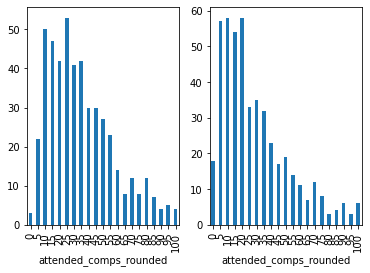

In [7]:
# https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell
_, axs = matplotlib.pyplot.subplots(1,2)

trojka[
    (trojka.attended_comps_rounded <= 100) & (trojka['rank'] <= 500)
].groupby(
    'attended_comps_rounded'
).size().plot.bar(ax=axs[0])

multi[
    (multi.attended_comps_rounded <= 100) & (multi['rank'] <= 500)
].groupby(
    'attended_comps_rounded'
).size().plot.bar(ax=axs[1])

# Vzporedna grafa sta žal zelo stisnjena po abscisi.

Ugotovili smo, da se je največ dobrih tekmovalcev v Kocki 3x3x3 udeležilo med 10 in 40 tekmovanj. Na drugi strani se je največ dobrih reševalcev na slepo udeležilo med 5 in 25 tekmovanj, kar je občutno manj. Najizkušenejši tekmovalci tako niso vedno najboljši. Kljub temu pa je za dober rezultat potrebna tudi neka mera izkušenj. Načeloma se za izkušenega tekmovalca obravnava vsak z deset ali več tekmovanji.<br>
Ena od razlag za razliko med grafoma bi lahko bila tudi to, da se tekmovanja v bolj eksotičnih disciplinah prirejajo redkeje.

#### Spreminjanje doseženega rezultata (v času oziroma točkah) v odvisnosti od uvrstitve
To lahko preverimo kot graf zvezne spremenljivke (rank). Predvidevam, da najboljših nekaj posameznikov močno odstopa od ostalih, torej bo 'odvod po uvrstitvi' pri nizkih uvrstitvah veliko večji kot pri višjih, pri slepem reševanju pa je ravno obratno, saj je cilj doseči čimveč točk (v primerjavi s čim nižjim časom pri Kocki 3x3x3).

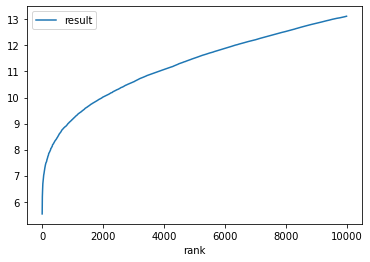

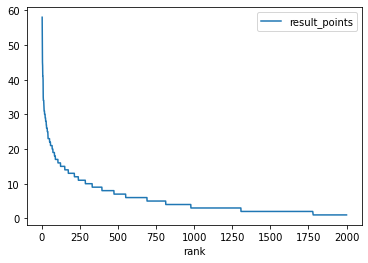

In [8]:
trojka.plot(x='rank', y='result')
multi.plot(x='rank', y='result_points')

Pobliže si oglejmo še enak graf, vendar le za najboljših 100 tekmovalcev.

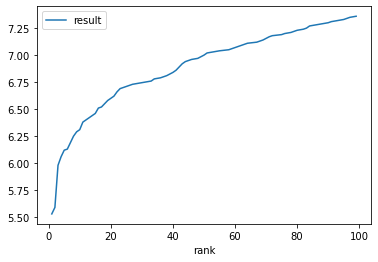

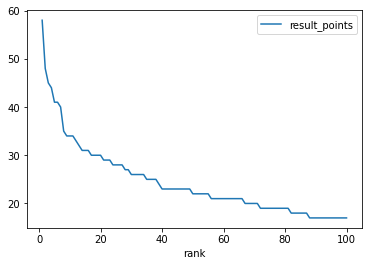

In [9]:
trojka[trojka['rank'] <= 100].plot(x='rank', y='result')
multi[multi['rank'] <= 100].plot(x='rank', y='result_points')

Našo hipotezo smo nedvoumno potrdili. Razlika med največjo elito in ostalimi je zelo očitna pri obeh disciplinah, še veliko bolj pri slepem reševanju. Pri spodnjih dveh grafih lahko vidimo, da se prvih 10 tekmovalcev razlikuje med seboj približno toliko kot preostalih 90 skupaj.

#### Rast popularnosti kockanja in porast dobrih tekmovalcev skozi čas
Vzemimo najboljših 500 rezultatov v obeh disciplinah in poglejmo, katerega leta je bilo zabeleženih največ vnosov. Ali so bili najboljši rezultati doseženi v zadnjih letih? Predvidevamo, da bo to veljalo pri 3x3x3, pri slepem reševanju pa ne. Več o razlogih za to spodaj.

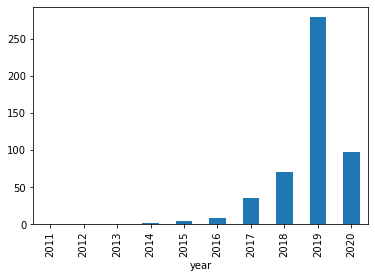

In [10]:
trojka[
    trojka['rank'] <= 500
].groupby('year').size().plot.bar()


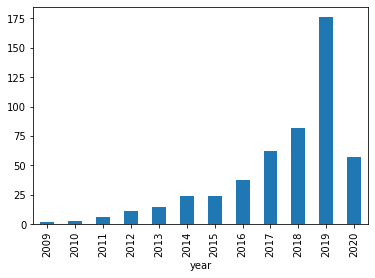

In [11]:
multi[
    multi['rank'] <= 500
].groupby('year').size().plot.bar()

Grafa potrjujeta našo hipotezo. Pri prvem vidimo, da pred letom 2017 ni več skoraj nobenega rezultata med najboljšimi 500. Drugi graf pa pokaže, da so bili dobri rezultati beleženi vse od leta 2012 naprej, še vedno pa vidimo eksponentno rast v zadnjih letih.<br>
Leto 2020 tukaj seveda ne pokaže pravega stanja, saj so bila vsa tekmovanja po nekaj mesecih ustavljena zaradi pandemije SARS-CoV-2, kar graf tudi lepo prikaže.<br>
Zakaj so skoraj vsi najboljši rezultati pri Kocki 3x3x3 doseženi v zadnjih nekaj letih? Razlogov je več. Najpomembnejši je razvoj opreme - samih kock ("hardware"). Približno pred desetimi leti so se na tržišču začeli pojavljati prve tako imenovane "speedcubes" - hitrostne kocke. Razvoj v zadnjih petih letih raste eksponentno, mehanizmi se konstantno izboljšujejo in vedno več podjetij razvija svoje inovativne rešitve za boljšo kocko. Tako kocka izpred petih let poznavalcu deluje kot iz kamene dobe. Drugi zelo pomemben razlog pa je razvoj samih reševalnih metod. Te postajajo vedno učinkovitejše, kar pripelje do boljših časov.<br>
Pri disciplini Več kock na slepo je vpliv "hardwara" veliko manjši. Bolj pomembna je mirna glava kot dobra kocka. Metoda reševanja se sicer tudi razvija, a na rezultate ne vpliva tako močno, saj principe spominske palače poznamo že zelo dolgo. Rezultati na grafih nas zato ne presenečajo.

#### Vpliv spola na lestvice
Pri drugih "športih" pogosto vidimo, da moški dosegajo boljše rezultate kot ženske. Tukaj pa fizična komponenta ni tako zelo ključna - sklepamo, da bi ženske lahko dosegale razultate, enakovredne moškim. Poglejmo, kaj pravijo številke. Vzemimo najboljših 2000 tekmovalcev v obeh disciplinah.

In [12]:
trojka[trojka['rank'] <= 2000].groupby('gender').size()
# Seštevek je večji od 2000, saj si zadnje mesto, ki je še nižje od 2000, deli več tekmovalcev.

gender
Female      47
Male      1974
dtype: int64

In [13]:
multi.groupby('gender').size()

gender
Female      77
Male      1923
dtype: int64

Vidimo, da vseeno prevladuje moški spol. Pri 3x3x3 sicer še bolj kot pri Multiple Blindfolded.

#### Vpliv velikosti tekmovanja na dosežene rezultate
Večina tekmovanj ima omejitev tekmovalcev med 50 in 200. Predvidevamo, da manjša tekmovanja pripeljejo do več dobrih rezultatov, saj je pritisk tekmovanja tam veliko manjši. 

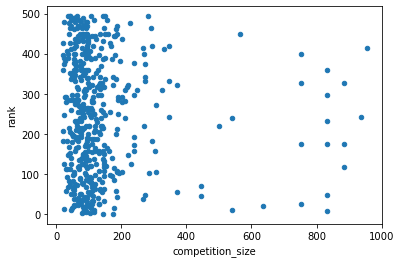

In [14]:
trojka[trojka['rank'] <= 500].plot.scatter(x='competition_size', y='rank')

Med velikostjo tekmovanja in doseženimi rezultati ne vidimo nobene povezave. Edina stvar, ki jo iz grafov lahko razberemo, je, da je velikih tekmovanj zelo malo (z več kot 400 tekmovalci). To so ponavadi le kontinentalna in svetovna prvenstva.

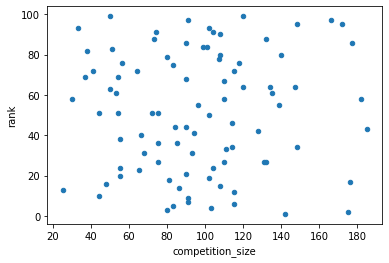

In [15]:
trojka[(trojka['rank'] <= 100) & (trojka.competition_size <= 200)].plot.scatter(x='competition_size', y='rank')

Tudi, če se omejimo le na najboljših 100 tekmovalcev ter zmerno velika tekmovanja, še vedno ne vidimo povezave med rezultati in velikostjo tekmovanja.

#### Najboljše države
Zanima nas, katere države imajo največ dobrih uvrstitev oziroma tekmovalcev. Ali lahko prepoznamo kakšno velesilo, kot pri drugih športih? Ali smo Slovenci konkurenčni v svetovnem merilu? Kje se nahajamo?<br>
V Evropi se je kot največja velesila uveljavila (presenetljivo?) Poljska, v svetu pa ZDA. Poglejmo, kaj na to pravijo številke.

In [16]:
trojka.groupby('citizen_of').size().sort_values().tail(13)

citizen_of
Indonesia             201
Republic of Korea     206
Mexico                209
Malaysia              209
Germany               212
Australia             214
Canada                321
Poland                328
Russia                359
India                 390
Philippines           409
China                1563
United States        1736
dtype: int64

Vidimo, da pri 3x3x3 prevladujeta ZDA in Kitajska. To se ne zdi presenetljivo. Največje presenečenje na seznamu predstavljajo Filipini, mogoče tudi Malezija ter Indonezija. Če se omejimo le na Evropo, številke Poljsko potrdijo kot nesporno zmagovalko. Edina druga evropska država na seznamu je Nemčija. Oba podatka sta pričakovana.

In [17]:
multi.groupby('citizen_of').size().sort_values().tail(13)

citizen_of
Brazil             55
Spain              57
United Kingdom     57
Japan              68
Australia          68
France             69
Germany            76
Russia             77
Indonesia          90
Poland             97
India              99
China             155
United States     283
dtype: int64

Tudi pri Multiple Blindfolded vidimo podobne rezultate. Številke so ustrezno manjše, saj gledamo vzorec 2000 tekmovalcev namesto 10 000 kot pri 3x3x3. Med najboljšimi državami pa vidimo več evropskih držav, razlika je kar velika. To nas ne sme presenečati, saj pri tej disciplini pride bolj do izraza kvaliteta kot kvantiteta tekmovalcev.<br>
Poglejmo še, kaj se zgodi, če se omejimo le na elito pri disciplini 3x3x3.

In [18]:
trojka[trojka['rank'] <= 500].groupby('citizen_of').size().sort_values().tail(13)

citizen_of
Ukraine                9
United Kingdom        10
Russia                10
Germany               12
India                 14
France                14
Australia             15
Republic of Korea     18
Philippines           20
Canada                21
Poland                21
China                 41
United States        137
dtype: int64

Opazimo močno prevlado ZDA. Poljska se drži zelo visoko glede na njeno število prebivalcev.<br>
Poglejmo še slovensko prisotnost na svetovni lestvici. Na spodnji (prvi) tabeli vidimo, da imamo ravno 10 tekmovalcev uvrščenih med najboljših 5000. Na spodnji (drugi) tabeli pa vidimo, da je med najboljših 2000 tekmovalcev pri multiju uvrščenih sedem Slovencev.

In [19]:
trojka[trojka.citizen_of == 'Slovenia'].head(13)

,rank,name,result,citizen_of,competition,year,gender,attended_competitions,competition_size,attended_comps_rounded
wca_id,,,,,,,,,,
2014ZUPA01,183,Staš Zupanc,7.72,Slovenia,Osijek Open 2017,2017,Male,21,33,20
2015CURM01,522,Nejc Ian Čurman,8.51,Slovenia,WCA Euro 2018,2018,Male,25,587,25
2016RUCI01,568,Marcel Ručigaj,8.61,Slovenia,Prebold Open 2019,2019,Male,32,52,30
2010GREG01,679,Jure Gregorc,8.79,Slovenia,Slovenian Open 2017,2017,Male,33,55,30
2010OMUL02,1340,Matic Omulec,9.51,Slovenia,Munich Open 2018,2018,Male,65,144,65
2018SUHA03,2191,Jan Vodopivec Suhadolc,10.13,Slovenia,Ljubljana Open 2019,2019,Male,5,44,5
2012DOBR01,2458,Blaž Dobravec,10.30,Slovenia,Ljubljana Open 2016,2016,Male,18,30,15
2015ANTL01,2458,Domen Antlej,10.30,Slovenia,Ljubljana Open 2016,2016,Male,4,30,0
2013GLIN01,3377,Rok Glinšek,10.81,Slovenia,Ljubljana Open 2019,2019,Male,16,44,15


In [20]:
multi[multi.citizen_of == 'Slovenia']

,rank,name,result,citizen_of,competition,year,result_points,result_time,gender,attended_competitions,333_average,333_world_rank,competition_size,attended_comps_rounded
wca_id,,,,,,,,,,,,,,
2016RUCI01,242,Marcel Ručigaj,12/13,Slovenia,Italian Championship 2019,2019,11,46:35,Male,32,8.61,569.0,179,30
2012VAJD01,681,Jernej Vajda,7/8,Slovenia,Slovenian Open 2015,2015,6,57:27,Male,4,14.64,15816.0,44,0
2009KOBA03,797,Branko Kobal,6/7,Slovenia,Maribor Open 2014,2014,5,54:06,Male,33,17.69,28720.0,20,30
2015BOLT01,900,Matej Bolta,4/4,Slovenia,Italian Championship 2019,2019,4,35:05,Male,19,11.69,5444.0,179,15
2012ZAKE02,989,Dušan Zakelšek,3/3,Slovenia,Slovenian Open 2016,2016,3,11:43,Male,51,14.02,13322.0,29,50
2010OMUL02,1186,Matic Omulec,3/3,Slovenia,Prebold Open 2019,2019,3,26:31,Male,65,9.51,1340.0,52,65
2012ZAKE01,1882,Darko Zakelšek,2/3,Slovenia,Slovenian Open 2017,2017,1,22:03,Male,18,13.51,11406.0,55,15


#### Povezava med disciplinama
Poglejmo, ali obstaja povezava med dobrimi multi tekmovalci ter njihovimi razultati v klasični Kocki 3x3x3. Logično bi bilo sklepati, da povezava obstaja. Disciplini sicer nista neposredno povezani s prenosom znanja iz ene na drugo, vseeno pa povezavo napovedujemo.<br>
Najprej poglejmo, koliko izmed najboljših 2000 multi tekmovalcev v disciplini 3x3x3 sploh ne tekmuje.

In [21]:
multi[multi.isnull().any(1)].head(13)

,rank,name,result,citizen_of,competition,year,result_points,result_time,gender,attended_competitions,333_average,333_world_rank,competition_size,attended_comps_rounded
wca_id,,,,,,,,,,,,,,
2018CAIH01,25,Hui Cai (蔡辉),31/34,China,Shandong Open 2019,2019,28,57:10,Male,11,NaN,NaN,345,10
2015KHOK02,55,Zeshaan Khokhar,25/28,Australia,WCA World Championship 2019,2019,22,1:00:00,Male,20,NaN,NaN,833,20
2020BARA02,61,Radomił Baran,21/21,Poland,BrizZon Poznań Side Open 2020,2020,21,56:32,Male,1,NaN,NaN,25,0
2009JIAN03,127,Tong Jiang (蒋彤),15/15,China,Beijing Summer Open 2009,2009,15,52:01,Male,2,NaN,NaN,162,0
2019FUJI07,202,Masato Fujiwara (藤原正人),14/15,Japan,Yono Summer 2019,2019,13,58:29,Male,5,NaN,NaN,77,5
2017DOVB01,328,Marharyta Dovbii (Маргарита Довбій),11/12,Ukraine,Kiev Super Blind 2020,2020,10,1:00:00,Female,8,NaN,NaN,38,5
2015TORR17,403,Sergio Augusto Guillén Torres,9/10,Peru,Campeonato Nacional Perubik 2017,2017,8,46:33,Male,10,NaN,NaN,190,10
2012OTAN01,425,Diego Millán Otón,8/8,Spain,Rebild Open 2014,2014,8,50:44,Male,20,NaN,NaN,22,20
2015BAOW01,456,Weina Bao (鲍伟娜),10/12,China,Beijing Open 2018,2018,8,56:31,Female,10,NaN,NaN,438,10


In [22]:
multi['333_average'].size - multi['333_average'].dropna().size

19

Takih tekmovalcev je 19 (izmed 2000), v zgornji tabeli pa vidimo, da so to tudi zelo dobri tekmovalci.

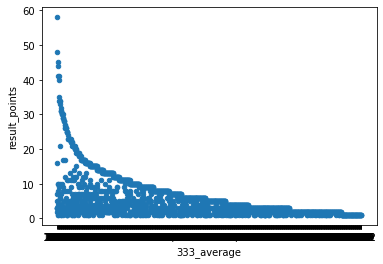

In [25]:
multi.dropna().plot.scatter(x='333_average', y='result_points')

Graf pokaže očitno povezavo med dobrimi razultati v obeh disciplinah. Hipotezo smo potrdili.

Po zaključeni analizi vidimo, da smo na nekatera vprašanja odgovorili pritrdilno spet na druga pa ne. Mislim, da smo cilj naloge uspešno dosegli.